In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt


In [2]:
#Import Data
df = pd.read_csv('1998_2019_raw.csv', index_col = False)

df


,Season,Date,GameID,Team,Location,Starters,MP,FG,FGA,3P,...,TRB,AST,STL,BLK,TOV,Non_Shooting,Shooting,Resulting_FT,PTS,Started
0,1,19971031,CHI@BOS1997-10-31,CHI,@,jordami01,42.0,7,23,0,...,6,4,2,1,3,2,0,0,30,1
1,1,19971031,CHI@BOS1997-10-31,CHI,@,kukocto01,35.8,6,13,0,...,4,2,3,1,3,3,2,1,12,1
2,1,19971031,CHI@BOS1997-10-31,CHI,@,harpero01,27.4,0,3,0,...,3,4,4,0,2,1,0,0,1,1
3,1,19971031,CHI@BOS1997-10-31,CHI,@,caffeja01,26.9,6,13,0,...,8,2,2,0,2,1,2,2,13,1
4,1,19971031,CHI@BOS1997-10-31,CHI,@,longllu01,21.1,4,6,0,...,5,0,0,2,4,8,0,2,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535023,22,20190410,SAC@POR2019-04-10,POR,Home,trentga02,48.0,8,19,1,...,2,3,1,1,1,2,0,0,19,1
535024,22,20190410,SAC@POR2019-04-10,POR,Home,laymaja01,48.0,7,15,2,...,4,2,1,0,4,2,1,1,19,1
535025,22,20190410,SAC@POR2019-04-10,POR,Home,leoname01,42.1,8,13,1,...,11,3,0,0,3,2,2,1,19,1
535026,22,20190410,SAC@POR2019-04-10,POR,Home,labissk01,40.6,12,17,2,...,15,1,2,1,2,5,2,3,29,1


In [3]:
#Arrange in order of total minutes played
grouped = df.groupby(['Season', 'Starters']).sum().sort_values(by=['Season', 'MP'])[['MP', 'FG', '3P', 'FGA', 'FT', 'PTS']]
grouped = pd.merge(grouped, pd.DataFrame(df.groupby(['Season', 'Starters']).mean().sort_values(by=['Season', 'MP'])['Started']), left_index = True, right_index = True)
grouped['Started'] = grouped['Started'].apply(lambda x : round(x, 0))

grouped['Color'] = grouped['Started'].apply(lambda x : 'blue' if x == 0 else 'red')
grouped

MP   FG   3P   FGA   FT   PTS  Started Color
Season Starters                                                   
1      caldwad01     2.7    0    0     0    0     0      0.0  blue
       mcdonmi01     4.3    0    0     0    0     0      0.0  blue
       mccanbo01     5.1    0    0     1    0     0      0.0  blue
       sealssh01     8.2    1    0     8    2     4      0.0  blue
       wingfdo01     8.2    0    0     3    1     1      0.0  blue
...                  ...  ...  ...   ...  ...   ...      ...   ...
22     georgpa01  2842.0  707  292  1614  453  2159      1.0   red
       harrito02  2848.4  611  156  1254  266  1644      1.0   red
       walkeke02  2863.6  731  260  1684  380  2102      1.0   red
       hardeja01  2867.3  843  378  1909  754  2818      1.0   red
       bealbr01   3027.9  764  209  1609  362  2099      1.0   red

[10188 rows x 8 columns]

<ipython-input-4-dd282689c882>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped['MP'] = round(grouped['MP'], 2)


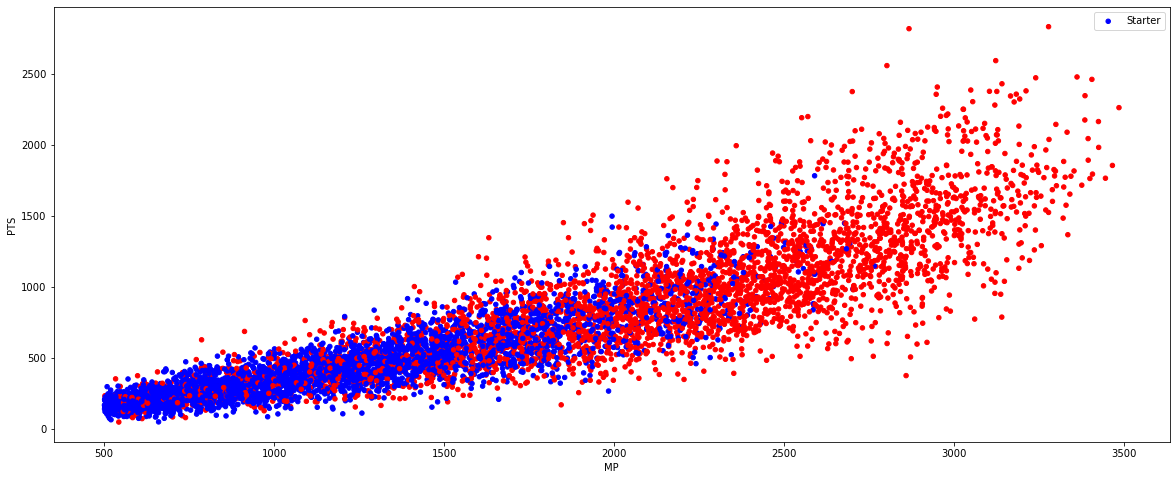

In [4]:
grouped = grouped[grouped['MP'] > 500]
grouped.plot.scatter('MP', 'PTS', c='Color', figsize=(20,8))
plt.legend(['Starter', 'Bench'])

grouped['MP'] = round(grouped['MP'], 2)
#Great deal of correlation between minutes and pts
#Let's see just how well of a fit it is

In [5]:
import statsmodels.api as sm
import numpy as np



x = np.array(grouped['MP'])
y = np.array(grouped['PTS']).reshape(-1, 1)
model = sm.OLS(y, x, hasconst=True).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 09 Dec 2020   Prob (F-statistic):                nan
Time:                        19:44:02   Log-Likelihood:                -49549.
No. Observations:                7259   AIC:                         9.910e+04
Df Residuals:                    7258   BIC:                         9.911e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4346      0.001    299.975      0.0

## Minutes and points

So on average, for every minute played by a player, they score .43 points.
74% of the variation in individual points scored is explained by looking at JUST minutes played. Wow!
We will return to this in more depth later, running a regression for predicting JUST minutes played

Now let's get more specific. Per minute, a player scores by doing what? Putting the basketball through the hoop (duh)
This action is represented easily with free throws and shooting stats
So if we can look at field goals and free throws, we should get much closer to an rsq of 1.00

In [6]:

grouped['2P'] = grouped['FG'] - grouped['3P']

x = np.array(grouped[[ '2P', '3P', 'FT']])

model = sm.OLS(y, x, hasconst=True).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.483e+34
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:44:02   Log-Likelihood:             2.0133e+05
No. Observations:                7259   AIC:                        -4.027e+05
Df Residuals:                    7256   BIC:                        -4.026e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             2.0000   2.88e-17   6.94e+16      0.0

<ipython-input-6-cf5bc703683d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grouped['2P'] = grouped['FG'] - grouped['3P']


We have an rsq of 1.00 ; This makes sense! Points is a linear combination of field goals and free throws! 

But this doesn't help us much if we want to predict the future. What if we express these numbers in terms of stats that can be reproduced without advanced information (We can't know how many buckets a player will make until they've finished the game, duh) 

In [7]:
#Effective Field Goal %, FT/FGA, and minutes played, are good places to start

#First, let's just try it with eFG% and FT/FGA
    #We are NOT taking into account how many times a player shoots the ball - only the RATE at which they make / miss
df['eFG%'] = ((df['FG'] + df['3P'] / 2) / df['FGA']) 
df['FT/FGA'] = (df['FG'] / df['FGA']) 

x = np.array(df.dropna()[['eFG%', 'FT/FGA']])
y = np.array(df.dropna()['PTS']).reshape(-1, 1)
model = sm.OLS(y, x, hasconst=True)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                 4.892e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:44:03   Log-Likelihood:            -1.7480e+06
No. Observations:              507784   AIC:                         3.496e+06
Df Residuals:                  507782   BIC:                         3.496e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.1786      0.161     94.397      0.0

Hmm. By looking at just the ratios, we explain almost NONE of the variation in points, even when using advanced knowledge. 
This should be obvious. If I make 1 of two shots, I have the exact same ratio as someone who makes 10 of 20. Our point totals will not be anywhere close to each other. So, *straight-up measures of efficiency are not good*, unless scaled with time & volume of play (minutes and usage)

But remember how correlated minutes are with points? Let's make couple of interaction variables

FG_interact = (MP * eFG%)

FT_interact = (MP * FT%)

In [8]:
df['FG_interact'] = df['MP'] * df['eFG%']
df['FT_interact'] = df['MP'] * df['FT/FGA']

x = np.array(df.dropna()[['FG_interact', 'FT_interact']])
y = np.array(df.dropna()['PTS']).reshape(-1, 1)
model = sm.OLS(y, x, hasconst=True)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                 7.804e+05
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:44:03   Log-Likelihood:            -1.5350e+06
No. Observations:              507784   AIC:                         3.070e+06
Df Residuals:                  507782   BIC:                         3.070e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5676      0.004    127.926      0.0

Way better! Now, why are we doing this? It may seem a bit counter intuitive. We started with an rsq of 1.00, using inputs that correlate linearly & directly to our outputs (pts). Then, (still using advanced, impossible-to-get-in-real-life, knowledge), we intentionally made our prediction worse. 

The goal here is to show that pts can be expressed in terms of stats that are averaged across the season, stats that can be predicted (Minutes, for example)

So we have scaled with time. But what abot usage? What about the fact that some of the NBAs bigest work-horses are *not* shot-takers? We need a metric for *how much of a ball-handler / hog someone is*

In [9]:
tm = df.groupby(['Season', 'GameID', 'Team']).sum()[['MP','FGA', 'FTA', 'TOV', 'PTS']]
gameIDs = {}

#Accumulate Team stats
for i in list(tm.index): 
    season = i[0]
    gid = i[1]
    team = i[2]
    
    if gid not in gameIDs.keys():
        gameIDs[gid] = {}
        gameIDs[gid][team] = {}
        for col in ['MP', 'FGA', 'FTA', 'TOV', 'PTS']:
            gameIDs[gid][team][col] = tm.loc[season, gid, team][col]
    else:
        if team not in gameIDs[gid].keys():
            gameIDs[gid][team] = {}
            for col in ['MP', 'FGA', 'FTA', 'TOV', 'PTS']:
                gameIDs[gid][team][col] = tm.loc[season, gid, team][col]


outdf =  {'Tm_MP': [], 'Tm_FGA': [], 'Tm_FTA': [], 'Tm_TOV': [], 'Tm_PTS': []}
for row in df.iterrows():

    for col in ['MP', 'FGA', 'FTA', 'TOV', 'PTS']:
        gid = row[1]['GameID']
        team = row[1]['Team']


        outdf['Tm_' + col].append(gameIDs[gid][team][col])

df = pd.merge(df, pd.DataFrame(outdf), left_index=True, right_index=True)

#garbage cleanup:
del outdf
del gameIDs

In [10]:
#Create Usage % column from the formula:
"""100*((Player’s Field Goal Attempts)+0.44*(Player’s Free Throw Attempts)+(Player’s Turnovers))*(Team’s Total Minutes)
/
((Team’s Total Field Goal Attempts)+0.44*(Team’s Total Free Throw Attempts)+Team’s Total Turnovers))*5*(Player’s Minutes)"""


df['FT%'] = df['FT'] / df['FTA']
df['USG'] = (  

    (df['FGA'] + .44 * df['FTA'] + df['TOV']) * df['Tm_MP'] 
    ) / (
    (df['Tm_FGA'] + .44 * df['Tm_FTA'] + df['Tm_TOV']) * 5 *  df['MP']
     )
df[['MP', 'USG', 'eFG%', 'FT/FGA', 'PTS']]

df['FG_interact'] = df['eFG%'] * df['MP'] * df['USG']
df['FT_interact'] = df['FT%'] * df['MP'] * df['USG'] 


x = np.array(df.dropna()[['FG_interact', 'FT_interact']])
y = np.array(df.dropna()['PTS']).reshape(-1, 1)
model = sm.OLS(y, x, hasconst=True)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 4.589e+06
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:45:35   Log-Likelihood:            -6.6337e+05
No. Observations:              314015   AIC:                         1.327e+06
Df Residuals:                  314013   BIC:                         1.327e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             3.3063      0.002   1390.239      0.0

Look at that! 93% of the variation in individual score can be expressed in terms of these stats: eFG%, USG%, MP, and FT%

I guess we better try and predict these stats before they happend! Lets start with Minutes played

# Predicting Minutes

In [11]:
#We're going to take a running season average, as well as the last three games minutes
#then, we will include whether or not the player started, how old they are, and their salary
def average(lst):
    if lst == []:
        return 0
    return sum(lst) / len(lst)

players = list(df['Starters'].unique())
rec = {}
for player in players:
    rec[player] = {}
    rec[player]['Avg'] = []
    for i in range(1, 4):
        rec[player][i] = 0

avg = []
oneAgo = []
twoAgo = []
threeAgo = []
for row in df.iterrows():
    player = row[1]['Starters']
    mp = row[1]['MP']
    oneAgo.append(rec[player][1])
    twoAgo.append(rec[player][2])
    threeAgo.append(rec[player][3])
    avg.append(average(rec[player]['Avg']))

    rec[player][3] = rec[player][2]
    rec[player][2] = rec[player][1]
    rec[player][1] = mp
    rec[player]['Avg'].append(mp)

df['1_ago'] = oneAgo
df['2_ago'] = twoAgo
df['3_ago'] = threeAgo
df['MP_avg'] = avg

#garbage cleanup
del oneAgo ; del twoAgo ; del threeAgo ; del avg ; del rec

#Our new variables:
df[['Started', '1_ago', '2_ago', '3_ago', 'MP_avg']]

,Started,1_ago,2_ago,3_ago,MP_avg
0,1,0.0,0.0,0.0,0.000000
1,1,0.0,0.0,0.0,0.000000
2,1,0.0,0.0,0.0,0.000000
3,1,0.0,0.0,0.0,0.000000
4,1,0.0,0.0,0.0,0.000000
...,...,...,...,...,...
535023,1,7.4,3.7,3.9,4.457143
535024,1,8.8,11.9,19.1,12.066429
535025,1,7.0,13.5,8.6,15.445408
535026,1,5.0,2.6,3.9,17.450000


## Accounting for age

In [12]:
#Let's grab the age variable - Conveniently, I scraped this data already
import pickle
with open('../PlayerInfo/ages.pickle', 'rb') as pik:
    adict = pickle.load(pik)

ages = []

for row in df.iterrows():
    ages.append(int(str(row[1]['Date'])[:4]) - int(adict[row[1]['Starters']]))

df['Age'] = ages

del ages


In [13]:
import statsmodels.api as sm
df['AgeDummy'] = df['Age'].apply(lambda x: 1 if x >= 30 else 0)
df['AgeInteract'] = df['Age'] * df['AgeDummy']

x = df[['Started', '1_ago', '2_ago', '3_ago', 'MP_avg', 'Age', 'AgeInteract']]
y = df['MP']
model = sm.OLS(y, x, hasconst=True)
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     MP   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                 1.666e+05
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:46:52   Log-Likelihood:            -1.7842e+06
No. Observations:              535028   AIC:                         3.568e+06
Df Residuals:                  535021   BIC:                         3.569e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Started         5.5599      0.026    215.526      

## Vexing Results

So we have a positive coeficcient on age... Even with the age_interact variable (Age x Age_Dummy), players in their 30s *and* their 20 are expected to see a *rise* in minutes as they age... this goes against our intuition. There are missing variables here! Can we find them? It will be hard to find more directly relevant information than what we have. We can find injury information, yes. But that is most difficult to categorize. What about Fixed Effects? Surely, there are ommitted, time-variant, entity-invariant factors that we aren't considering! 

Think about trends in the NBA. Think about the Kawhi drama and the hot-topic of rest days. With the rise of sports analytics and injury-preventing science, team are putting their ballers on the court less and less. Let's introduce dummy variables for the seasons!

## Fixed Effects

In [14]:
dummies = pd.get_dummies(df['Season'])
df = pd.merge(df, dummies, left_index=True, right_index=True)
df

,Season,Date,GameID,Team,Location,Starters,MP,FG,FGA,3P,...,13,14,15,16,17,18,19,20,21,22
0,1,19971031,CHI@BOS1997-10-31,CHI,@,jordami01,42.0,7,23,0,...,0,0,0,0,0,0,0,0,0,0
1,1,19971031,CHI@BOS1997-10-31,CHI,@,kukocto01,35.8,6,13,0,...,0,0,0,0,0,0,0,0,0,0
2,1,19971031,CHI@BOS1997-10-31,CHI,@,harpero01,27.4,0,3,0,...,0,0,0,0,0,0,0,0,0,0
3,1,19971031,CHI@BOS1997-10-31,CHI,@,caffeja01,26.9,6,13,0,...,0,0,0,0,0,0,0,0,0,0
4,1,19971031,CHI@BOS1997-10-31,CHI,@,longllu01,21.1,4,6,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535023,22,20190410,SAC@POR2019-04-10,POR,Home,trentga02,48.0,8,19,1,...,0,0,0,0,0,0,0,0,0,1
535024,22,20190410,SAC@POR2019-04-10,POR,Home,laymaja01,48.0,7,15,2,...,0,0,0,0,0,0,0,0,0,1
535025,22,20190410,SAC@POR2019-04-10,POR,Home,leoname01,42.1,8,13,1,...,0,0,0,0,0,0,0,0,0,1
535026,22,20190410,SAC@POR2019-04-10,POR,Home,labissk01,40.6,12,17,2,...,0,0,0,0,0,0,0,0,0,1


In [15]:
lst = list(dummies.columns) + ['Started', '1_ago', '2_ago', '3_ago', 'MP_avg', 'Age', 'AgeInteract']

x = df[lst]
y = df['MP']
x = sm.add_constant(x)
model = sm.OLS(y, x, hasconst=True)

print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     MP   R-squared:                       0.654
Model:                            OLS   Adj. R-squared:                  0.654
Method:                 Least Squares   F-statistic:                 3.607e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:46:54   Log-Likelihood:            -1.7824e+06
No. Observations:              535028   AIC:                         3.565e+06
Df Residuals:                  534999   BIC:                         3.565e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.117e+08   2.93e+10     -0.007      

Woah! Now we have a negative coeficcient for age! We have isolated the effect of age by controlling for entity-fixed, time-variant effects. Very cool!

Takeaway: Since we have gotten rid of ommitted variable bias, that impies (obviously) that there WAS ommited variable bias before. This implies that our new variables are correlated with age, and also with minutes played. In other words, the NBA was both more work-heavy AND generally older in the past. Let's test this theory!

<AxesSubplot:xlabel='Season'>

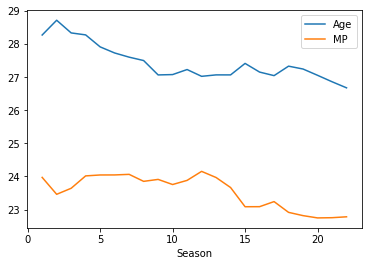

In [16]:
df.groupby('Season').mean()[['Age', 'MP']].plot()

Yep! I was right! 

In [17]:
df.groupby('Starters').std()['USG'] * 100

Starters
abdulma02     8.129835
abdulta01     7.159381
abdursh01     5.683405
abrinal01     7.395181
ackeral01    15.409856
               ...    
zimmede01     9.756667
zimmest01    15.624723
zipsepa01     7.168785
zizican01    11.177744
zubaciv01     9.813047
Name: USG, Length: 2055, dtype: float64

In [18]:
import datetime
def fixDate(string):
    year = int(str(string)[:4])
    month = int(str(string)[4:6])
    day = int(str(string)[6:8])
    return datetime.date(year, month, day)
df['Date'] = df['Date'].apply(fixDate)
fair = []
before = 1
earliest = datetime.date(1997, 10, 31)
for row in df.iterrows():
    if row[1]['Season'] != before:
        earliest = row[1]['Date']
    if (row[1]['Date'] - earliest).days < 15:
        fair.append(False)
    else:
        fair.append(True)
    before = row[1]['Season']
df['Fair'] = fair

In [19]:
# df[df['Fair']]
x = df[df['Fair']][lst]
y = df[df['Fair']]['MP']
x = sm.add_constant(x)

model = sm.OLS(y, x, hasconst=None)

print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     MP   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                 3.345e+04
Date:                Wed, 09 Dec 2020   Prob (F-statistic):               0.00
Time:                        19:47:34   Log-Likelihood:            -1.6122e+06
No. Observations:              484905   AIC:                         3.225e+06
Df Residuals:                  484876   BIC:                         3.225e+06
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           5.0120      0.102     49.224      